In [1]:
import os
import pickle
import random
import sys
import warnings

sys.path.append(os.path.join(".."))

import optuna
import numpy as np
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

In [4]:
# Read dictionary pkl file
with open(os.path.join('..', 'data', 'processed_files', 'pkls', 'X_D.pkl'), "rb") as fp:
    X = pickle.load(fp)

with open(os.path.join('..', 'data', 'processed_files', 'pkls', 'y_D.pkl'), "rb") as fp:
    y = pickle.load(fp)


In [5]:
X['Train'].shape

(16870800, 12, 54)

In [9]:
# X_train, y_train, X_val, y_val
X_train, X_val, X_test = (X[key] for key in X.keys())
y_train, y_val, y_test = (y[key].argmax(axis=1) for key in y.keys())

In [10]:
model = CatBoostClassifier(verbose=True, auto_class_weights='SqrtBalanced', eval_metric="TotalF1")
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, use_best_model=True, verbose_eval=True)


Learning rate set to 0.131243
0:	learn: 0.6083224	test: 0.6302739	best: 0.6302739 (0)	total: 16.4s	remaining: 4h 32m 54s
1:	learn: 0.6515572	test: 0.6663772	best: 0.6663772 (1)	total: 30.1s	remaining: 4h 10m 7s
2:	learn: 0.6542313	test: 0.6617435	best: 0.6663772 (1)	total: 46.4s	remaining: 4h 17m 10s
3:	learn: 0.6626210	test: 0.6592197	best: 0.6663772 (1)	total: 1m 1s	remaining: 4h 16m 31s
4:	learn: 0.6582494	test: 0.6680286	best: 0.6680286 (4)	total: 1m 18s	remaining: 4h 21m 4s
5:	learn: 0.6658728	test: 0.6710022	best: 0.6710022 (5)	total: 1m 34s	remaining: 4h 21m 3s
6:	learn: 0.6652234	test: 0.6681284	best: 0.6710022 (5)	total: 1m 50s	remaining: 4h 21m 21s
7:	learn: 0.6663037	test: 0.6650660	best: 0.6710022 (5)	total: 2m 4s	remaining: 4h 16m 55s
8:	learn: 0.6678361	test: 0.6690174	best: 0.6710022 (5)	total: 2m 17s	remaining: 4h 13m 8s
9:	learn: 0.6729665	test: 0.6684620	best: 0.6710022 (5)	total: 2m 32s	remaining: 4h 10m 51s
10:	learn: 0.6784106	test: 0.6744008	best: 0.6744008 (10)	t

In [11]:
y_pred = model.predict(X_val)
f1 = f1_score(y_val, y_pred, average='weighted') 


              precision    recall  f1-score   support

           0       0.93      0.85      0.89   1756391
           1       0.27      0.11      0.16     14225
           2       0.45      0.38      0.41    124749
           3       0.38      0.66      0.48    239935

    accuracy                           0.80   2135300
   macro avg       0.51      0.50      0.49   2135300
weighted avg       0.84      0.80      0.81   2135300



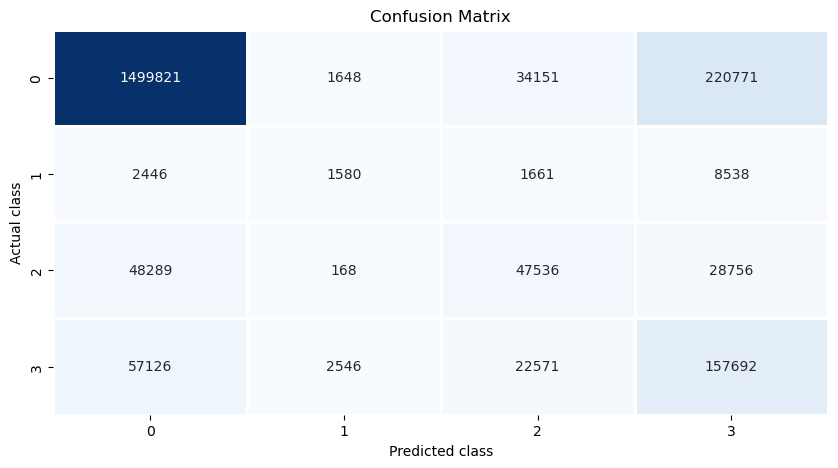

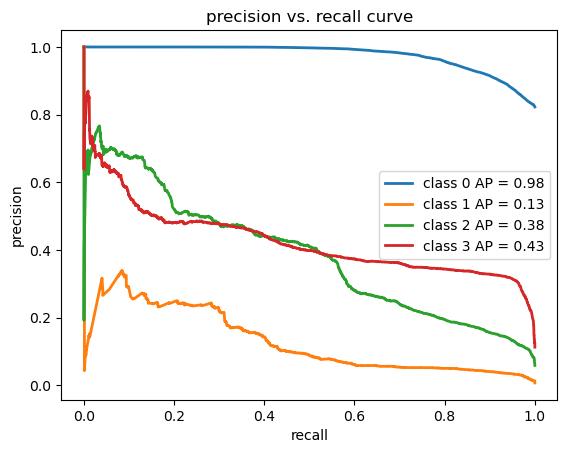

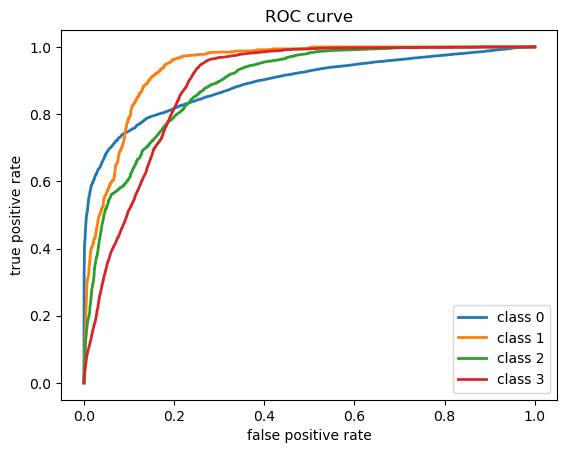

0 ROC AUC OvR: 0.8929
1 ROC AUC OvR: 0.9397
2 ROC AUC OvR: 0.8898
3 ROC AUC OvR: 0.8858
average ROC AUC OvR: 0.9021


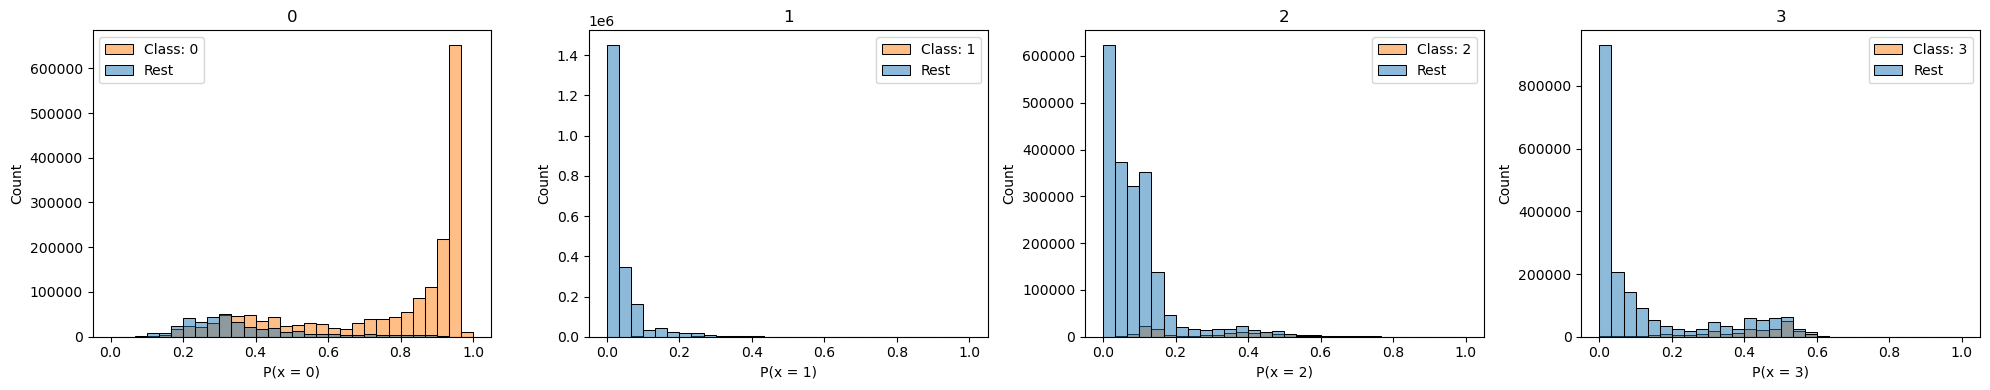

0 vs 1 ROC AUC OvO: 0.9492
1 vs 0 ROC AUC OvO: 0.9616
0 vs 2 ROC AUC OvO: 0.8628
2 vs 0 ROC AUC OvO: 0.9053
0 vs 3 ROC AUC OvO: 0.9053
3 vs 0 ROC AUC OvO: 0.8938
1 vs 2 ROC AUC OvO: 0.8959
2 vs 1 ROC AUC OvO: 0.7379
1 vs 3 ROC AUC OvO: 0.8024
3 vs 1 ROC AUC OvO: 0.6120
2 vs 3 ROC AUC OvO: 0.7858
3 vs 2 ROC AUC OvO: 0.8041
average ROC AUC OvO: 0.8430


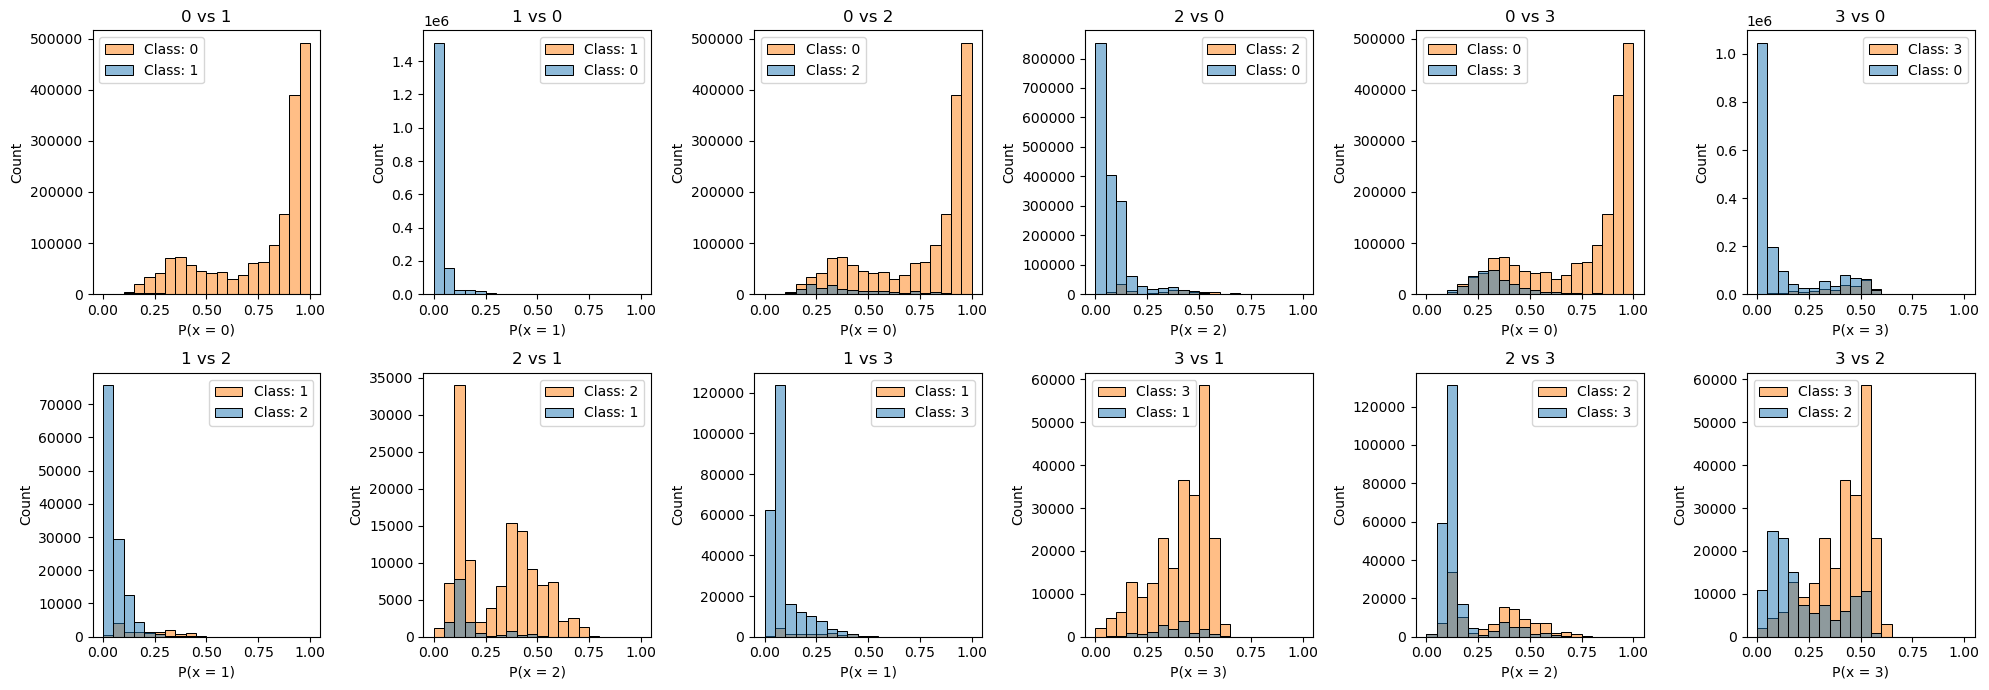

None


In [12]:
from src.model_utils import custom_multiclass_report

# check metrics
yprob = model.predict_proba(X_test)
ypred = np.argmax(yprob, 1)
ytest = y_test


print(custom_multiclass_report(ytest, ypred, yprob))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90   1764289
           1       0.24      0.22      0.23     24864
           2       0.36      0.60      0.45    128977
           3       0.52      0.69      0.59    293070

    accuracy                           0.81   2211200
   macro avg       0.52      0.59      0.54   2211200
weighted avg       0.85      0.81      0.83   2211200



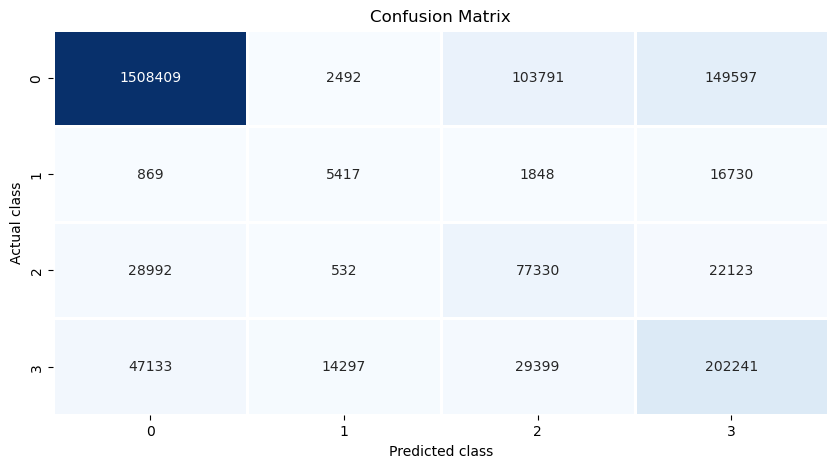

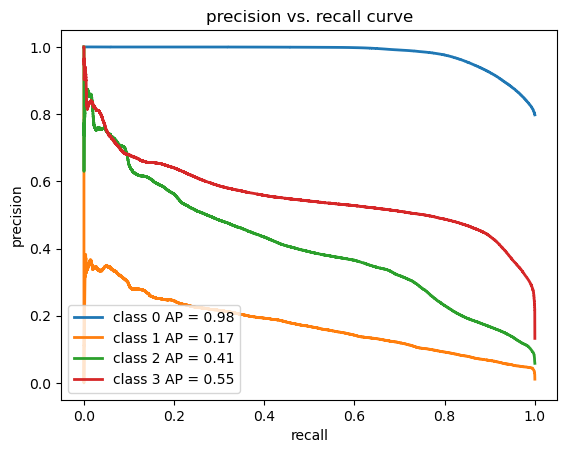

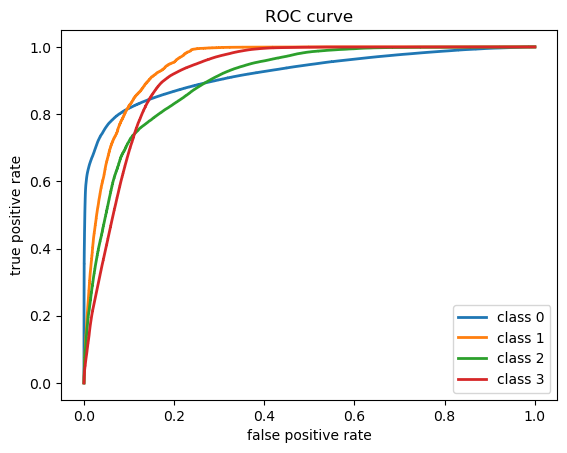

0 ROC AUC OvR: 0.9221
1 ROC AUC OvR: 0.9477
2 ROC AUC OvR: 0.9036
3 ROC AUC OvR: 0.9171
average ROC AUC OvR: 0.9226


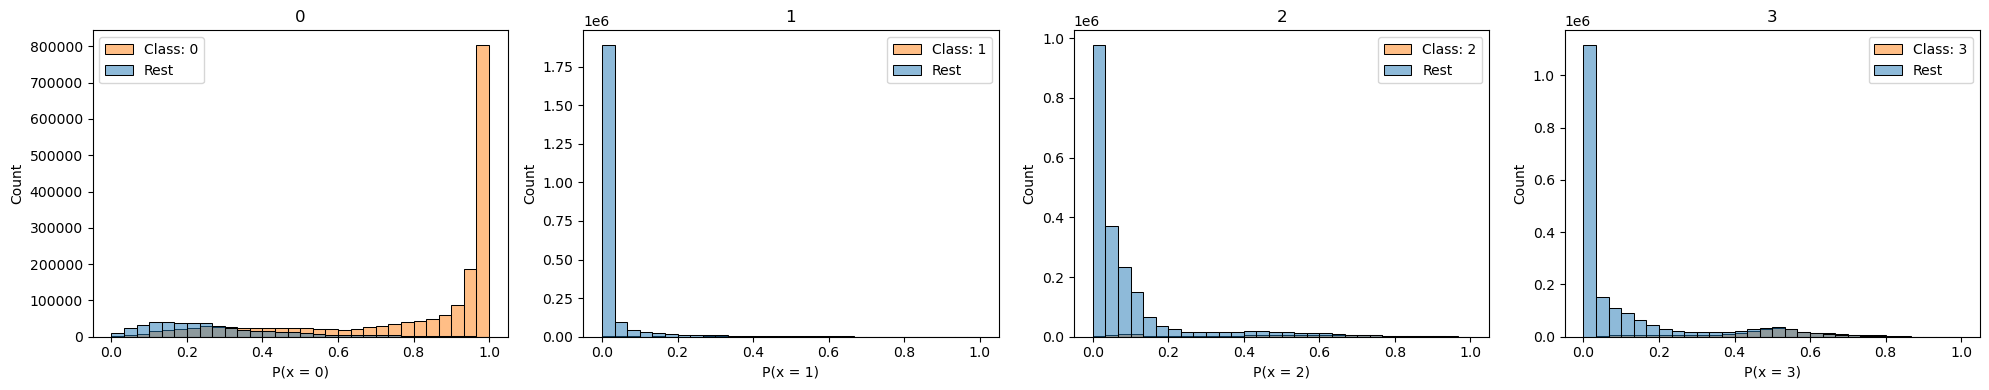

0 vs 1 ROC AUC OvO: 0.9667
1 vs 0 ROC AUC OvO: 0.9793
0 vs 2 ROC AUC OvO: 0.9089
2 vs 0 ROC AUC OvO: 0.9115
0 vs 3 ROC AUC OvO: 0.9241
3 vs 0 ROC AUC OvO: 0.9265
1 vs 2 ROC AUC OvO: 0.9244
2 vs 1 ROC AUC OvO: 0.8864
1 vs 3 ROC AUC OvO: 0.7678
3 vs 1 ROC AUC OvO: 0.5690
2 vs 3 ROC AUC OvO: 0.8575
3 vs 2 ROC AUC OvO: 0.8553
average ROC AUC OvO: 0.8731


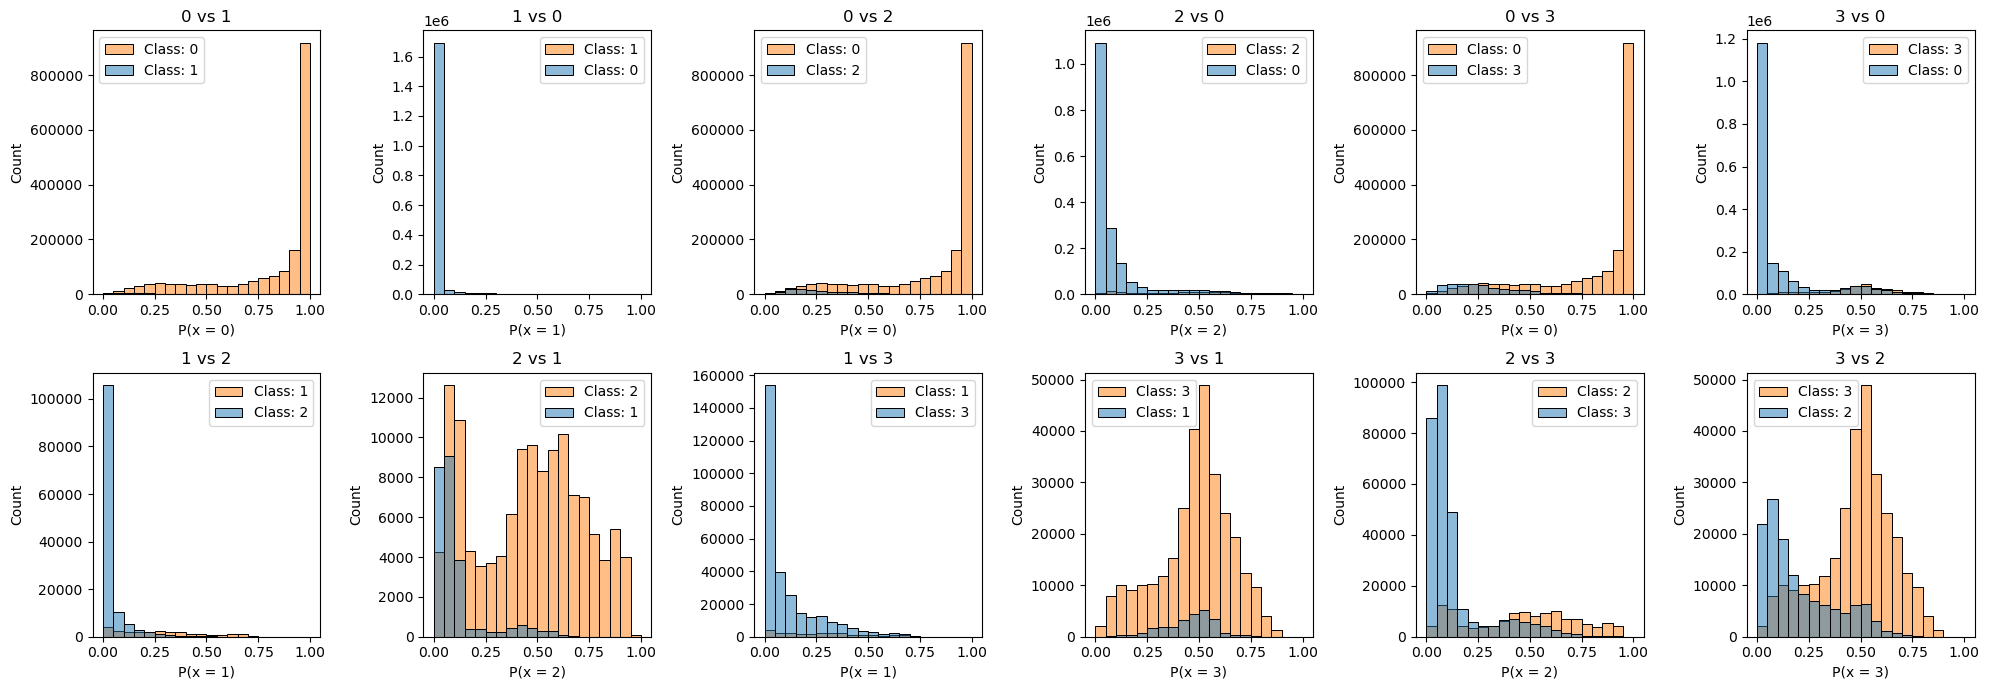

None


In [ ]:
from src.model_utils import custom_multiclass_report

# check metrics
yprob = model.predict_proba(X_test)
ypred = np.argmax(yprob, 1)
ytest = y_test

print(custom_multiclass_report(ytest, ypred, yprob))

In [8]:
# Save the trained model to a file
model_filename = os.path.join('..', 'results', 'pickle_models', 'catboost_base_FR.pkl')
model.save_model(model_filename)
print("Model saved as:", model_filename)

Model saved as: ../results/pickle_models/catboost_base_FR.pkl
